## Final Project: Predicting the Probability of Mental Illness From Parner Violence Prevelence. 

In [2]:
#Importing Packages 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/Users/rosesvonkin/Desktop/Python/29583-0001-Data.tsv', sep='\t')

/var/folders/bw/827z4ygn6b7ccxtp5vct36840000gn/T/ipykernel_91629/3171542256.py:12: DtypeWarning: Columns (12,14,15,16,17,18,19,27,29,30,33,35,36,41,43,46,50,57,61,67,68,75,79,80,81,95,100,104,107,113,114,117,119,120,121,122,123,126,130,131,136,139,144,150,152,158,159,160,161,163,164,168,170,173,178,179,180,182,184,192,193,194,196,202,203,205,206,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,

In [3]:
# Select independent and dependent variables.
bool_cc = df.columns.str.contains('^cc')
bool_pts = df.columns.str.contains('^pts')
bool_sub = df.columns.str.contains('^sub')
bool_dep = df.columns.str.contains(r'^dep.+[0-9]$')

# Create dataframe for explanatory variables
data = df.loc[:, bool_cc]

# Convert all columns to numeric, forcing non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

# Scale data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Define the count_cutoff function
def count_cutoff(dataset, rating):
    result = np.zeros(dataset.shape[0])
    for i in range(dataset.shape[0]):
        count = np.sum(dataset.iloc[i, :] >= rating)
        result[i] = count
    return result

# Define the count_cutoff_dep function
def count_cutoff_dep(dataset, rating):
    result = np.zeros(dataset.shape[0])
    for i in range(dataset.shape[0]):
        count = np.sum(dataset.iloc[i, :] <= rating)
        result[i] = count
    return result

    We will build our predictive model using conflict tactic scales (CTS) variables, with a focus on variables starting with the prefix "CC" which measure the prevalence and severity of The variables branch out according to the subsequent characters they have. The third character determines the type of violent act committed, while the fourth character determines the severity of the act. The fifth character determines who the actor was, and the seventh character determines how it is scored. 

    The variables are scored differently, so they were scaled to give the model better predictive power. The accuracy of our predictions are obviously dependent on the accuracy of the scaling, and the fact that these conflict tactic scales are based on observational accounts from the individuals they represent. In addition to this the data frame we restrict our analysis to only contains these measures of interpartner abuse as explanatory variables without controlling for different demographic or prior characteristics due to limitations in processing power that prevent us from accurately scaling so many factors. 


In [4]:
# Creation of target variables
highest_ptsd = 3
highest_subs = 3
highest_dep = 2
pts_cutoff = 4
sub_cutoff = 4
dep_cutoff = 4

# Apply the functions to the subset of the original DataFrame (df) that is relevant
df_pts = df.loc[:, bool_pts]
df_sub = df.loc[:, bool_sub]
df_dep = df.loc[:, bool_dep]

# Ensure that the length matches the length of `data`
data_scaled['pts_target'] = np.where(count_cutoff(df_pts.loc[data.index], highest_ptsd) >= pts_cutoff, 1, 0)
data_scaled['subst_target'] = np.where(count_cutoff(df_sub.loc[data.index], highest_subs) >= sub_cutoff, 1, 0)
data_scaled['depr_target'] = np.where(count_cutoff_dep(df_dep.loc[data.index], highest_dep) >= dep_cutoff, 1, 0)

print(data_scaled.head())

     ccnes1    ccnep1    ccncs1    ccncp1    ccpms1    ccpmp1    ccams1  \
0  0.085836  0.091103  0.727498  0.733310 -0.536453 -0.604006  0.311169   
1 -1.062840 -0.484686 -1.678419 -1.584528  0.952598  0.890749  0.311169   
2  1.234512  1.242681  1.328977  1.312769  0.952598  0.890749  0.311169   
3 -0.488502 -1.060474 -1.076940 -1.584528  0.952598 -1.351383  0.311169   
4  0.085836  0.666892  0.126019  0.153850  0.952598 -0.604006  0.311169   

     ccamp1    ccams2    ccamp2  ...   ccssp2y   ccssp3y   ccssp4y  ccsss1y  \
0  0.285430 -0.370796  0.293295  ... -0.073783 -0.080093 -0.080817 -0.07432   
1  0.285430  0.289200  0.293295  ... -0.073783 -0.080093 -0.080817 -0.07432   
2  0.285430  0.289200  0.293295  ... -0.073783 -0.080093 -0.080817 -0.07432   
3 -4.286033  0.289200  0.293295  ... -0.073783 -0.080093 -0.080817 -0.07432   
4  0.285430  0.289200  0.293295  ... -0.073783 -0.080093 -0.080817 -0.07432   

    ccsss2y   ccsss3y   ccsss4y  pts_target  subst_target  depr_target  
0

    Target variables being assessed are PTSD, substance abuse, and depression. Indicators of PTSD were broken down into eight categories, where each one indicates a symptom of PTSD rated on a scale of 1 to 4, with 4 being the highest. Indicators of substance abuse and depression are also broken down into eight categories, with the ratings for depression being scaled in the opposite order where 1 is considered the highest indicator of depression. 

    The target variables were then created by counting the number of occurrences of rating a symptom 3 or greater for PTSD and substance abuse, and 2 or lower for depression. If the number of occurrences exceeded a cutoff of 4, the respondent was labeled as having PTSD, substance abuse, or depression. The accuracy of these measurements, and thus our predictions, is limited to the specifications provided in the data. Thus, it should be noted that many of the symptoms specified for these characteristics lack information on the amount of time they have occurred for which is a key aspect in determining the true presence of a mental illness. 


The analysis shows that, conditional on the cutoffs we specified, about 39% of respondents in the dataset report experiencing PTSD, 12% report experiencing substance abuse, and 21% report experiencing depression.

 We then run correlation matrices to find the particular conflict tactic item variables that are most highly correlated with the target variables.  We will then compare that to the results we obtain from LASSO cross validation of the CT items, as well as the results of the random forest.  


Using logistic regression, the model predicts the likelihood of a person experiencing PTSD, substance abuse, or depression based on the symptoms they report. Without utilizing cross validation, it appears that the most significant predictors for PTSD involve severe  psychological aggression and abuse both inflicted by the individual as well as their partner. Those for substance abuse also involve psychological aggression, but on a minor scale inflicted by the partner. Those most highly correlated with depression involve “negotiation” or psychological aggression on a minor scale as well. 


In [17]:
# Train Test Split
N = data_scaled.shape[0]
exp_var_ind = list(range(data_scaled.shape[1] - 3))
indices = np.random.choice(data_scaled.index, size=int(N * 0.8), replace=False)

train_pts = data_scaled.loc[indices, data_scaled.columns[exp_var_ind + [-3]]]
test_pts = data_scaled.drop(indices).loc[:, data_scaled.columns[exp_var_ind + [-3]]]

train_subt = data_scaled.loc[indices, data_scaled.columns[exp_var_ind + [-2]]]
test_subt = data_scaled.drop(indices).loc[:, data_scaled.columns[exp_var_ind + [-2]]]

train_dep = data_scaled.loc[indices, data_scaled.columns[exp_var_ind + [-1]]]
test_dep = data_scaled.drop(indices).loc[:, data_scaled.columns[exp_var_ind + [-1]]]

# Check columns in train_pts to ensure 'pts_target' is present
print(train_pts.columns)

Index(['ccnes1', 'ccnep1', 'ccncs1', 'ccncp1', 'ccpms1', 'ccpmp1', 'ccams1',
       'ccamp1', 'ccams2', 'ccamp2',
       ...
       'ccsms3y', 'ccssp1y', 'ccssp2y', 'ccssp3y', 'ccssp4y', 'ccsss1y',
       'ccsss2y', 'ccsss3y', 'ccsss4y', 'pts_target'],
      dtype='object', length=391)


    In order to obtain the most relevant predictors of these mental illnesses, we will first perform an 80-20 split into training and test sets were done for each of the target (dependent) variables.The models for PTSD, substance abuse, and depression were then trained using cross-validation LASSO with 20 folds each. We then produce random forests, with 200 trees and a minimum node size of 5. The accuracy function is created via confusion matrix, and ROC curves are plotted for in-sample and out-of-sample data. The ROC curves are then compared to each other to assess which resulting estimates, from the LASSO model or the random forest, are better predictors for in and out of sample data. 

    The resulting model is intended to be useful for identifying the specific abusive risk factors that are most associated with mental health conditions and developing targeted interventions to address them. However, there are many factors that should also be considered when assessing the validity of these estimates. In addition to that, we must consider that our target variables have been created without considering the persistence of the symptoms used to make them, as well as other relevant factors that are key to determining the true presence of these mental illnesses. Both of these facts are likely to significantly impact the accuracy of our predictions. 


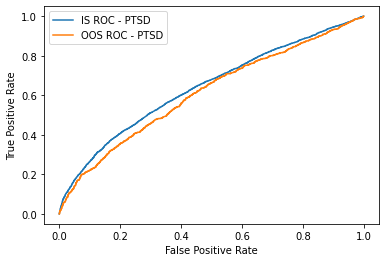

In [7]:
# PTSD Training Model
x_ptsd_train = train_pts.drop('pts_target', axis=1)
y_ptsd_train = train_pts['pts_target']
x_ptsd_test = test_pts.drop('pts_target', axis=1)
y_ptsd_test = test_pts['pts_target']

lasso_logit_ptsd = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000, n_jobs=-1)
lasso_logit_ptsd.fit(x_ptsd_train, y_ptsd_train)

preds_ptsd_is = lasso_logit_ptsd.predict_proba(x_ptsd_train)[:, 1]
preds_ptsd_oos = lasso_logit_ptsd.predict_proba(x_ptsd_test)[:, 1]

# ROC curves
fpr, tpr, _ = roc_curve(y_ptsd_train, preds_ptsd_is)
plt.plot(fpr, tpr, label='IS ROC - PTSD')

fpr, tpr, _ = roc_curve(y_ptsd_test, preds_ptsd_oos)
plt.plot(fpr, tpr, label='OOS ROC - PTSD')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

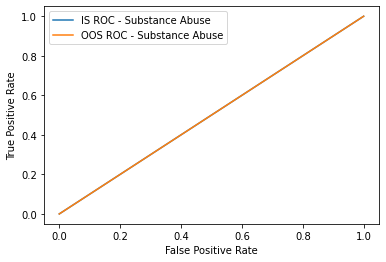

In [8]:
# Substance Abuse Training Model
x_sub_train = train_subt.drop('subst_target', axis=1)
y_sub_train = train_subt['subst_target']
x_sub_test = test_subt.drop('subst_target', axis=1)
y_sub_test = test_subt['subst_target']

lasso_logit_substance = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000, n_jobs=-1)
lasso_logit_substance.fit(x_sub_train, y_sub_train)

preds_subs_is = lasso_logit_substance.predict_proba(x_sub_train)[:, 1]
preds_subs_oos = lasso_logit_substance.predict_proba(x_sub_test)[:, 1]

# ROC curves
fpr, tpr, _ = roc_curve(y_sub_train, preds_subs_is)
plt.plot(fpr, tpr, label='IS ROC - Substance Abuse')

fpr, tpr, _ = roc_curve(y_sub_test, preds_subs_oos)
plt.plot(fpr, tpr, label='OOS ROC - Substance Abuse')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

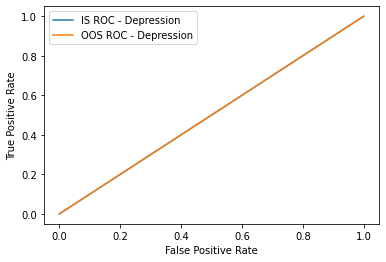

In [9]:
# Depression Training Model
x_dep_train = train_dep.drop('depr_target', axis=1)
y_dep_train = train_dep['depr_target']
x_dep_test = test_dep.drop('depr_target', axis=1)
y_dep_test = test_dep['depr_target']

lasso_logit_dep = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000, n_jobs=-1)
lasso_logit_dep.fit(x_dep_train, y_dep_train)

preds_dep_is = lasso_logit_dep.predict_proba(x_dep_train)[:, 1]
preds_dep_oos = lasso_logit_dep.predict_proba(x_dep_test)[:, 1]

# ROC curves
fpr, tpr, _ = roc_curve(y_dep_train, preds_dep_is)
plt.plot(fpr, tpr, label='IS ROC - Depression')

fpr, tpr, _ = roc_curve(y_dep_test, preds_dep_oos)
plt.plot(fpr, tpr, label='OOS ROC - Depression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In all above ROC curves it appears that the training sample works on par with the test sample as shown by the in sample and out of sample curves. 

In [10]:
# Random Forests
def evaluate_model(model, X_train, y_train, X_test, y_test, title):
    # In-sample predictions and ROC curve
    preds_is = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, preds_is)
    plt.plot(fpr, tpr, label='IS ROC - ' + title)
    
    # Out-of-sample predictions and ROC curve
    preds_oos = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, preds_oos)
    plt.plot(fpr, tpr, label='OOS ROC - ' + title)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Confusion matrix and metrics
    preds_is_binary = (preds_is > 0.5).astype(int)
    preds_oos_binary = (preds_oos > 0.5).astype(int)

    print(f"Confusion Matrix (In-Sample) - {title}:")
    print(pd.crosstab(preds_is_binary, y_train))
    print(f"Confusion Matrix (Out-of-Sample) - {title}:")
    print(pd.crosstab(preds_oos_binary, y_test))

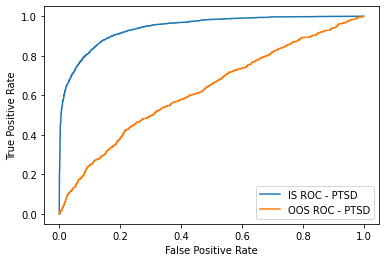

Confusion Matrix (In-Sample) - PTSD:
pts_target     0     1
row_0                 
0           6904  1915
1             78  2504
Confusion Matrix (Out-of-Sample) - PTSD:
pts_target     0    1
row_0                
0           1530  757
1            248  316


In [11]:
# Random Forest - PTSD
rf_ptsd = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42)
rf_ptsd.fit(x_ptsd_train, y_ptsd_train)
evaluate_model(rf_ptsd, x_ptsd_train, y_ptsd_train, x_ptsd_test, y_ptsd_test, 'PTSD')

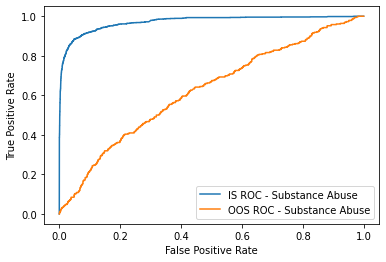

Confusion Matrix (In-Sample) - Substance Abuse:
subst_target      0     1
row_0                    
0             10085  1295
1                 0    21
Confusion Matrix (Out-of-Sample) - Substance Abuse:
subst_target     0    1
row_0                  
0             2519  332


In [12]:
# Random Forest - Substance Abuse
rf_substance = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42)
rf_substance.fit(x_sub_train, y_sub_train)
evaluate_model(rf_substance, x_sub_train, y_sub_train, x_sub_test, y_sub_test, 'Substance Abuse')

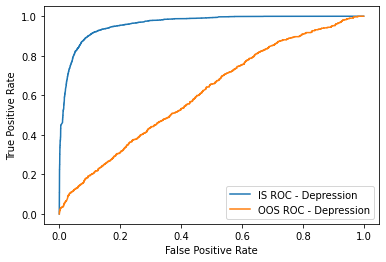

Confusion Matrix (In-Sample) - Depression:
depr_target     0     1
row_0                  
0            9079  2152
1               2   168
Confusion Matrix (Out-of-Sample) - Depression:
depr_target     0    1
row_0                 
0            2220  620
1               2    9


In [13]:
# Random Forest - Depression
rf_depression = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42)
rf_depression.fit(x_dep_train, y_dep_train)
evaluate_model(rf_depression, x_dep_train, y_dep_train, x_dep_test, y_dep_test, 'Depression')

As we can observe from the ROC curves above, the model didn’t perform as well in the out of sample data–potentially resulting from the overfitting of the random forest model on the training set. 


    Given the results shown above, the lasso models perform on-par with one another when using on the training and test sets. They also perform roughly the same with random forests when testing on the test sets. To improve the OOS performance of the models it would be ideal to add to the regression the accurately scaled variables for various demographic and predetermined characteristics that are present in the data.  However, this will take more computational power. The random forest models, on the other hand, seem to be suffering from overfitting given the high AUC score when used on the training sets. A potential solution to this would be to reduce the number of trees and minimum nodes. 

    It is also worth noting that without the context of the specific variables and dataset, it is difficult to provide a more detailed interpretation of the results. Additionally, it would be useful to evaluate the out-of-sample predictive performance of the models using measures such as AICc or cross-validation.
    
    The predictive models could have some potential to be useful for government or non-governmental organizations in identifying individuals who may be at risk for mental health issues and providing them with targeted interventions. But while predictive models could be useful in certain contexts, it is important to consider the potential limitations of using a predictive model that includes minimal background information in decision-making, particularly when it comes to sensitive outcomes such as mental health. Severe ethical concerns arise with using such a model, including the potential for discrimination and stigmatization of individuals identified as at-risk, in addition to suffering from an extreme lack of information on relevant demographic and predetermined characteristics.
